# **Step-1: Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# **Step-2: Load the dataset**

In [5]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# **Step-3: Preprocess the data**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Features and labels
X = df.drop(columns=['species'])
y = df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step-4: Train and evaluate KNN with different K**

In [12]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} | Accuracy: {acc:.2f}")

K=1 | Accuracy: 1.00
K=2 | Accuracy: 1.00
K=3 | Accuracy: 1.00
K=4 | Accuracy: 1.00
K=5 | Accuracy: 1.00
K=6 | Accuracy: 1.00
K=7 | Accuracy: 1.00
K=8 | Accuracy: 1.00
K=9 | Accuracy: 1.00
K=10 | Accuracy: 1.00


# **Step-5: Confusion matrix for best K(K=3)**

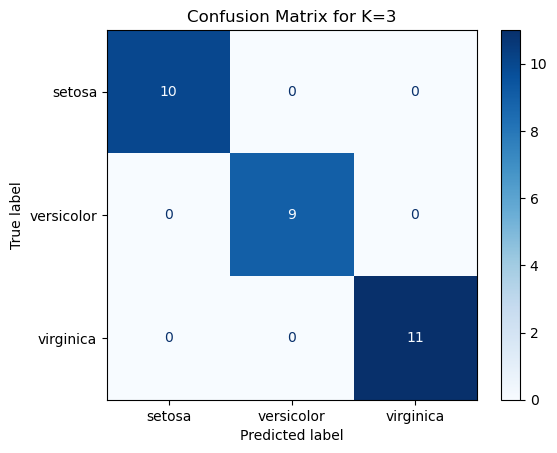

In [16]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()

# **Step-6: Visualize decision boundaries**

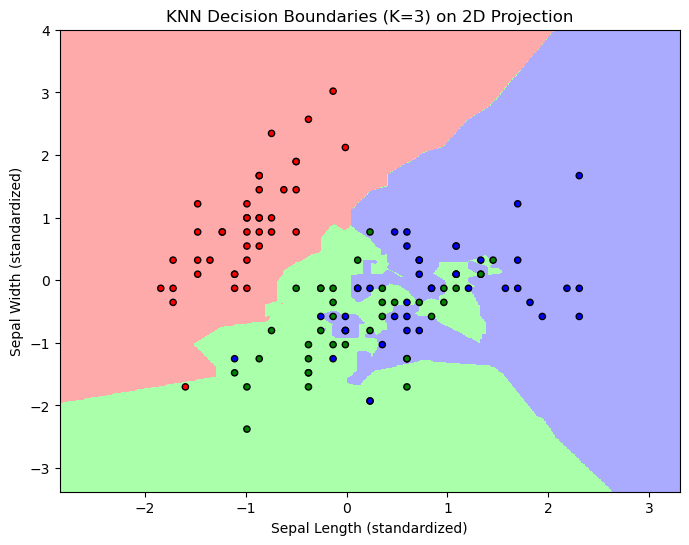

In [21]:
# Use only first two features
X_2D = df[['sepal_length', 'sepal_width']]
y_2D = df['species']

X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42)

scaler2D = StandardScaler()
X_train2D_scaled = scaler2D.fit_transform(X_train2D)
X_test2D_scaled = scaler2D.transform(X_test2D)

knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X_train2D_scaled, y_train2D)

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = 0.02  # mesh step size
x_min, x_max = X_train2D_scaled[:, 0].min() - 1, X_train2D_scaled[:, 0].max() + 1
y_min, y_max = X_train2D_scaled[:, 1].min() - 1, X_train2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'green', 'blue'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train2D_scaled[:, 0], X_train2D_scaled[:, 1], c=y_train2D, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("KNN Decision Boundaries (K=3) on 2D Projection")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.savefig('knn.png')
plt.show()